<a href="https://colab.research.google.com/github/GiaLop/Python-Projects/blob/main/Mall_customer_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from time import time

# imposto il seed
RANDOM_SEED = 1

# importo il dataset
url = 'https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/mall_customers.csv'
df = pd.read_csv(url)

# elimino la colonna dell'id
df = df.drop('CustomerID', axis=1)

# creo una copia su cui lavorare
dfc = df.copy()

# imposto il tema e rcParams
sns.set_theme()
plt.rcParams['figure.figsize'] = (10,8)

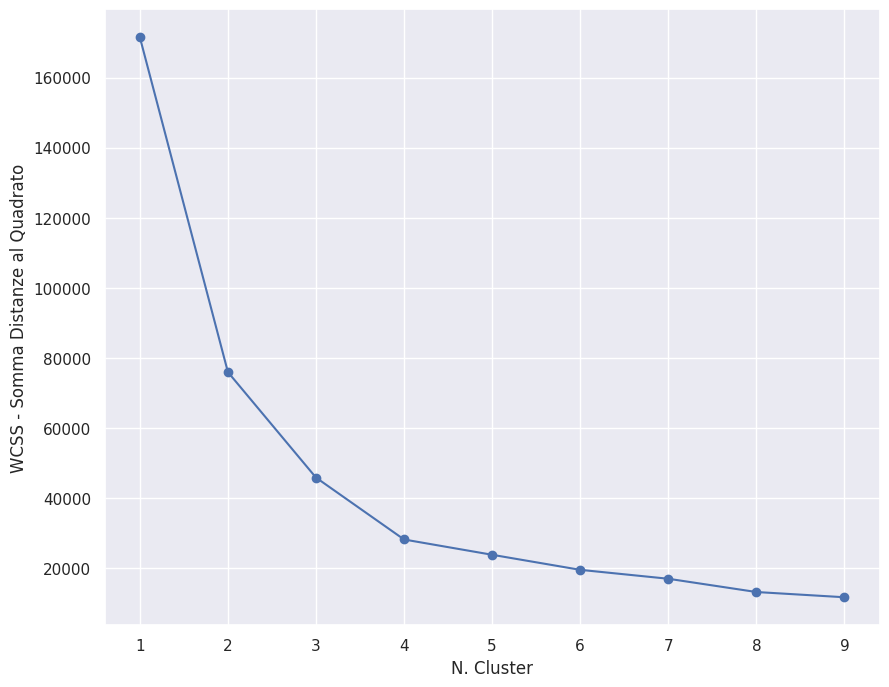

In [ ]:
# preparo i dati per il I modello
X = dfc[['Age', 'Spending Score (1-100)']].values

# creo il grafico dell'elbow per cercare il K

# definisco una funzione per velocizzare nei prossimi passaggi
def plot_elbow(data):

  sse = {}

  for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=RANDOM_SEED).fit(data)
    sse[k]= round(kmeans.inertia_, 3)
  plt.plot(list(sse.keys()), list(sse.values()), marker='o')
  plt.xlabel('N. Cluster')
  plt.ylabel('WCSS - Somma Distanze al Quadrato')
  plt.show()

# visualizzo il grafico
plot_elbow(X)

In [ ]:
# creo il I modello avendo scelto k=4 dal grafico Elbow
km = KMeans(n_clusters=4, init='k-means++', random_state=RANDOM_SEED).fit(X)
tick = time()

print(f'Il modello è stato addestrato in {time()- tick:.5f} secondi')

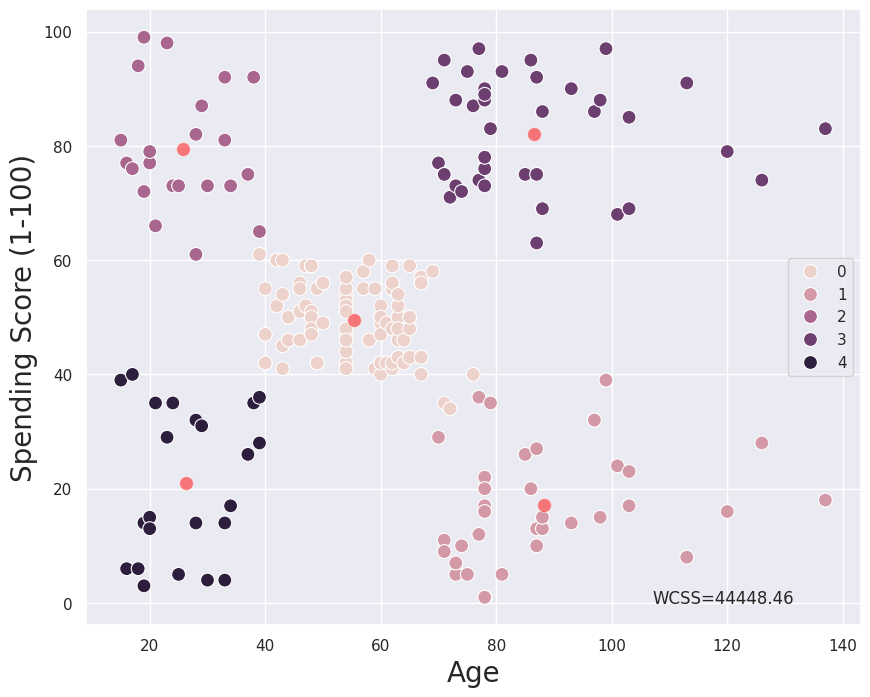

In [ ]:
# visualizzo il modello

# definisco una funzione per velocizzare nei prossimi passaggi
def plot_cluster(model, data, axes_labels=None, print_WCSS=False):

  y_pred = model.predict(data)

  sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_pred, s=100)

  centers = model.cluster_centers_
  sns.scatterplot(x=centers[:,0], y=centers[:,1], s=100, c='red', alpha=0.5)

  if axes_labels:
    plt.xlabel(axes_labels[0], fontsize=20)
    plt.ylabel(axes_labels[1], fontsize=20)

  if print_WCSS:
    plt.text(data[:,0].max()- 30, 0, f"WCSS={model.inertia_:.2f}")
  plt.show()

plot_cluster(km, X, axes_labels=['Age', 'Spending Score (1-100)'], print_WCSS=True)

In [ ]:
# valuto il modello

# definisco una funziona che riitorna le statistiche

def cluster_scores(model, data):
  # Totale varianza (TSS)
  data_mean = np.mean(data, axis=0)
  TSS = np.sum((data - data_mean) ** 2)

  # Within-cluster (WCSS)
  WCSS = model.inertia_

  # Between-cluster (BCSS)
  BCSS = TSS - WCSS

  print(f"TSS: {TSS:.2f}")
  print(f"WCSS (Inertia): {WCSS:.2f}")
  print(f"BCSS: {BCSS:.2f}")
  print(f"R^2 (BCSS/TSS): {BCSS/TSS:.3f}")
  # BCSS rappresenta la “varianza tra i cluster” (cioè quanto i cluster sono distinti tra loro rispetto alla media globale).
  # TSS è la varianza totale dei dati.
  # Quindi, BCSS / TSS dice “quanta parte della varianza totale è spiegata dal fatto che i dati sono raggruppati in questi cluster”.

cluster_scores(km, X)

TSS: 171535.50
WCSS (Inertia): 28172.71
BCSS: 143362.79
R^2 (BCSS/TSS): 0.836


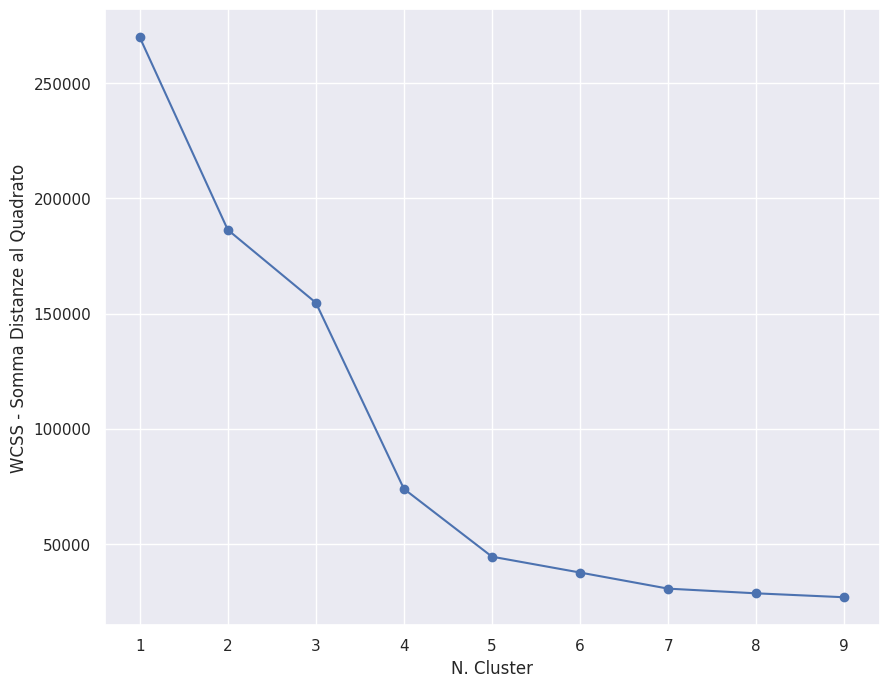

In [ ]:
# Preparo i dati per il II modello
X = dfc[['Annual Income (k$)', 'Spending Score (1-100)']].values

# evoco la funzione per l'elbow
plot_elbow(X)

In [ ]:
# creo il II modello avendo scelto k=5
km = KMeans(n_clusters=5, init='k-means++', random_state=RANDOM_SEED).fit(X)
tick = time()

print(f"Il modello è stato addestrato in {time()-tick:.5f} secondi")

Il modello è stato addestrato in 0.00013 secondi


In [ ]:
# evoco la funziona per visualizzare gli scores
cluster_scores(km, X)

TSS: 269981.28
WCSS (Inertia): 44448.46
BCSS: 225532.82
R^2 (BCSS/TSS): 0.835


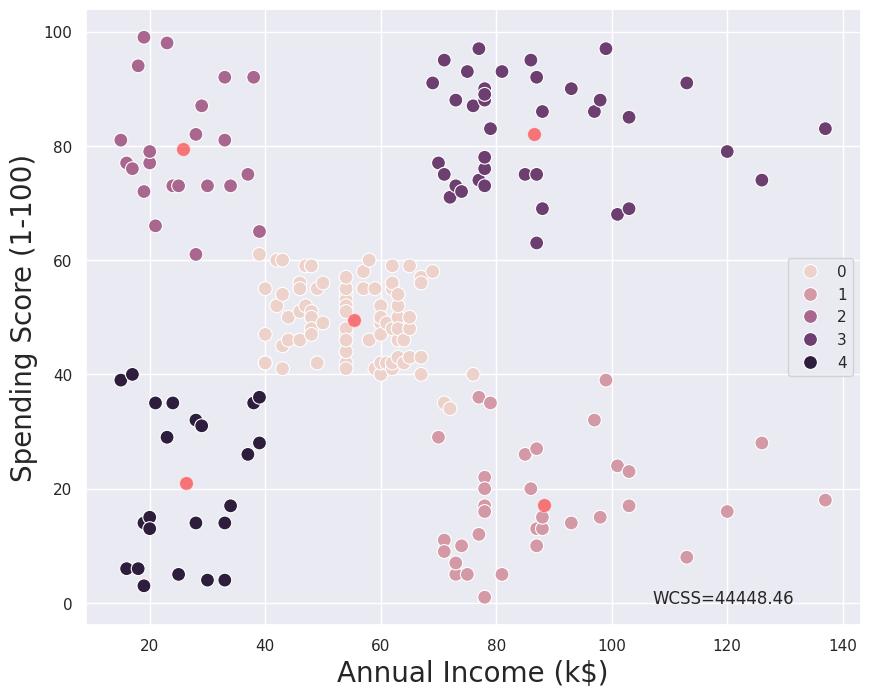

In [ ]:
# visualizzo i cluster nel II modello
plot_cluster(km, X, axes_labels=['Annual Income (k$)', 'Spending Score (1-100)'], print_WCSS=True)

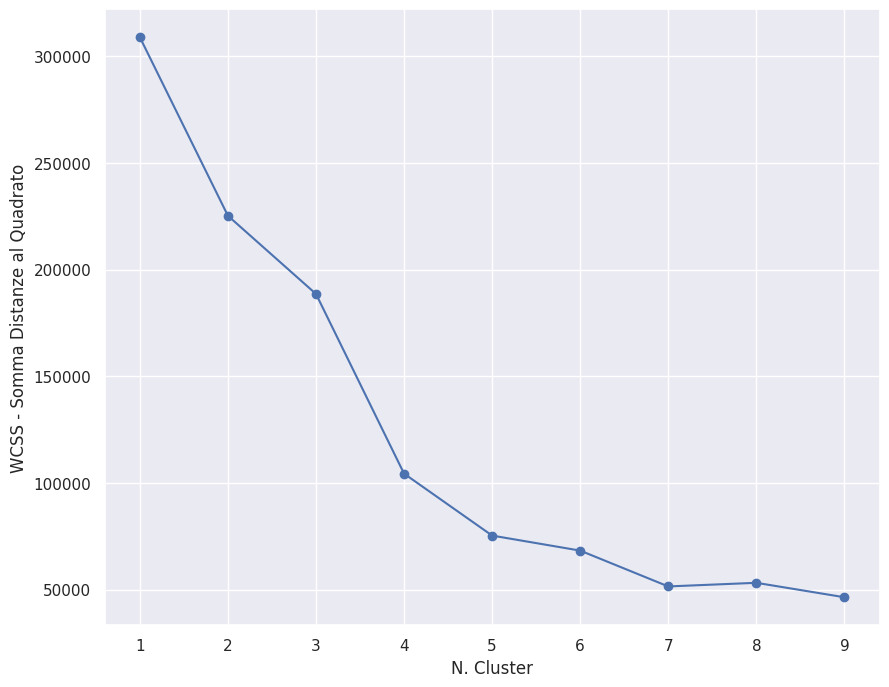

In [ ]:
# preparo i dati per il III modello
X = dfc[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values

# visualizzo l'elbow
plot_elbow(X)

In [ ]:
# scelto k=5 creo il III modello
km = KMeans(n_clusters=5, init='k-means++', random_state=RANDOM_SEED).fit(X)
tick = time()

print(f"Il modello è stato addestrato in {time()- tick:.5f} secondi")

Il modello è stato addestrato in 0.00016 secondi


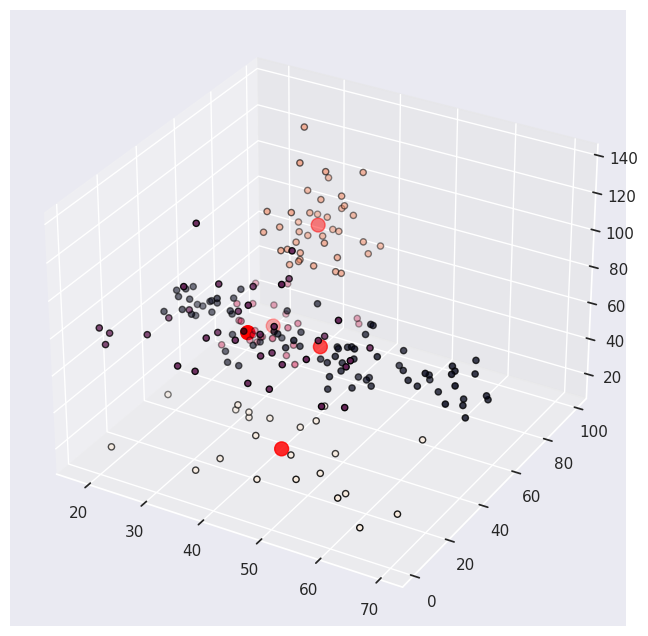

In [ ]:
# visualizzo il modello in 3D avendo 3 Features
y_pred = km.predict(X)
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], edgecolors= "black", c=y_pred)
ax.scatter3D(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], color="red", s=100)

plt.show()

In [ ]:
# creo il nuovo df da salvare in excel
df_e = pd.read_csv(url)

# preparo i dati per il modello
X = df_e[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# calcolo cluster e groups
km = KMeans(n_clusters=5, init='k-means++', random_state=RANDOM_SEED).fit(X)
y_pred = km.predict(X)

# creo il df con i dati che mi servono
n_df = pd.DataFrame({
    'CustomerID': df_e['CustomerID'].values,
    'Customer Group': y_pred
    })

# salvo su excel
n_df.to_excel('mall_customers_prediction.xlsx')